In [44]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [45]:
base = pd.read_csv('datasets/petr4_treinamento.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [46]:
base.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [47]:
base = base.dropna()

In [48]:
base.shape

(1242, 7)

In [49]:
base_treinamento = base.iloc[:, 1:2].values #apenas a primeira coluna(abertura)

In [50]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [51]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [52]:
base_treinamento_normalizada.shape

(1242, 1)

In [53]:
X = [] #previsores
y = [] #preço real
for i in range(90, 1242): #90 preços anteriores
    X.append(base_treinamento_normalizada[i-90: i, 0])
    y.append(base_treinamento_normalizada[i,0])
    
X, y = np.array(X), np.array(y)

In [54]:
X.shape

(1152, 90)

In [55]:
y.shape

(1152,)

In [56]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape=(X.shape[1], 1)))#x.shape[1],1 enviando 90 colunas para a rede neural, apenas a coluna com valor de abertura
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1, activation='linear'))

regressor.summary()

c:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
regressor.compile(optimizer='rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [58]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0668 - mean_absolute_error: 0.1924
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0168 - mean_absolute_error: 0.1021
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0160 - mean_absolute_error: 0.0999
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0136 - mean_absolute_error: 0.0923
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0118 - mean_absolute_error: 0.0820
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0097 - mean_absolute_error: 0.0753
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0092 - mean_absolute_error: 0.0733
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0094 - mean_absolute_error: 0.0751
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0069 - mean_absolute_error: 0.0653
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0083 - mean_absolute_error: 0.0712
Epoch 11/100
36/36 ━━━━━━━━━━

In [59]:
base_teste = pd.read_csv('datasets/petr4_teste.csv')
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [60]:
base_teste.shape

(22, 7)

In [61]:
y_teste = base_teste.iloc[:, 1:2].values
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [62]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)

In [63]:
base_completa.shape

(1264,)

In [64]:
base_completa

0     19.990000
1     19.809999
2     20.330000
3     20.480000
4     20.110001
        ...    
17    19.340000
18    19.620001
19    19.670000
20    19.770000
21    19.740000
Name: Open, Length: 1264, dtype: float64

In [65]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values # 1264 - 22 - 90 = 1152

In [66]:
entradas

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [67]:
entradas.shape

(112,)

In [68]:
entradas = entradas.reshape(-1,1)
entradas.shape

(112, 1)

In [69]:
entradas = normalizador.transform(entradas)

In [70]:
X_teste = []
for i in range(90,112):
    X_teste.append(entradas[i-90: i,0])

In [71]:
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [72]:
X_teste.shape

(22, 90, 1)

In [73]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


In [74]:
previsoes

array([[0.5544604 ],
       [0.5585634 ],
       [0.5628542 ],
       [0.569176  ],
       [0.57616895],
       [0.5821947 ],
       [0.5879308 ],
       [0.5924903 ],
       [0.59498155],
       [0.5963933 ],
       [0.59904885],
       [0.6032743 ],
       [0.6113541 ],
       [0.62449443],
       [0.63942266],
       [0.6518508 ],
       [0.660282  ],
       [0.66474646],
       [0.671498  ],
       [0.6831366 ],
       [0.69736135],
       [0.71085674]], dtype=float32)

In [75]:
previsoes = normalizador.inverse_transform(previsoes)

In [76]:
previsoes.mean()

16.952272

In [77]:
y_teste.mean()

17.87454563636364

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

0.9222724409235176

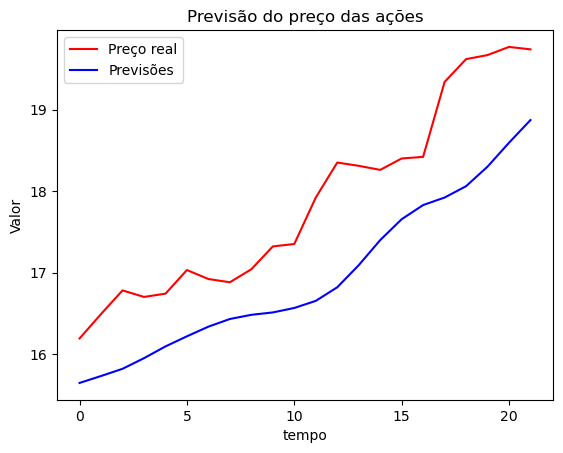

In [79]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("tempo")
plt.ylabel("Valor")
plt.legend();